# 📊 Loan Approval - AI Bias Bounty Hackathon

**INTRODUCTION**

This data science workflow processes a fictitious loans approval data set, and attempts to consider the AI Bias incorporated into the data and modelling.

Submitted by Alessandra Adina & Sydney Nicole Calo

**INSTALL & IMPORT PYTHON PACKAGES**

In [53]:
!pip uninstall -y numpy
!pip install numpy==1.26.4 pandas --force-reinstall --no-cache-dir
!pip install shap lime xgboost lightgbm --quiet

Found existing installation: numpy 1.26.4
Uninstalling numpy-1.26.4:
  Successfully uninstalled numpy-1.26.4
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.2/91.2 kB 9.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 291.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 255.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 229.9/229.9 kB 417.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 509.2/509.2 kB 407.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 347.8/347.8 kB 393.5 MB/s eta 0:00:00
  Attempting uninstall: pytz
    Found existing installation: pytz 2025.2
    Uninstalling pytz-2025.2:
      Successfully uninstalled pytz-2025.2
  Attempting uninstall: tzdata
    Found existing installation: tzdata 2025.2
    Uninstalling tzdata-2025.2:
      Successfully uninstalled tzdata-2025.2
  Attempting uninstall: si

In [54]:
!pip install seaborn

In [55]:
# 📌 1. Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, accuracy_score, precision_score, recall_score, f1_score

from xgboost import XGBClassifier, plot_importance
from lightgbm import LGBMClassifier

import shap
from lime.lime_tabular import LimeTabularExplainer

warnings.filterwarnings('ignore')


**LOAD DATA & EXPLORATORY DATA ANALYSIS**


In [56]:
# 📌 2. Load Data
from google.colab import files
uploaded = files.upload()

df = pd.read_csv('loan_access_dataset.csv')
df.head()

Saving loan_access_dataset.csv to loan_access_dataset (3).csv


,ID,Gender,Race,Age,Age_Group,Income,Credit_Score,Loan_Amount,Employment_Type,Education_Level,Citizenship_Status,Language_Proficiency,Disability_Status,Criminal_Record,Zip_Code_Group,Loan_Approved
0,1,Female,White,74,Over 60,112117,641,378691,Full-time,Graduate,Citizen,Fluent,No,No,High-income Suburban,Approved
1,2,Female,White,36,25-60,155943,664,441856,Self-employed,High School,Permanent Resident,Limited,No,No,Urban Professional,Denied
2,3,Female,White,27,25-60,130933,550,401760,Full-time,Graduate,Citizen,Fluent,No,No,Urban Professional,Denied
3,4,Male,White,67,Over 60,165816,804,159264,Gig,Some College,Citizen,Fluent,No,No,Urban Professional,Approved
4,5,Male,Multiracial,57,25-60,81510,694,256742,Full-time,Some College,Visa Holder,Fluent,No,No,Rural,Denied


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   ID                    10000 non-null  int64 
 1   Gender                10000 non-null  object
 2   Race                  10000 non-null  object
 3   Age                   10000 non-null  int64 
 4   Age_Group             10000 non-null  object
 5   Income                10000 non-null  int64 
 6   Credit_Score          10000 non-null  int64 
 7   Loan_Amount           10000 non-null  int64 
 8   Employment_Type       10000 non-null  object
 9   Education_Level       10000 non-null  object
 10  Citizenship_Status    10000 non-null  object
 11  Language_Proficiency  10000 non-null  object
 12  Disability_Status     10000 non-null  object
 13  Criminal_Record       10000 non-null  object
 14  Zip_Code_Group        10000 non-null  object
 15  Loan_Approved         10000 non-null 

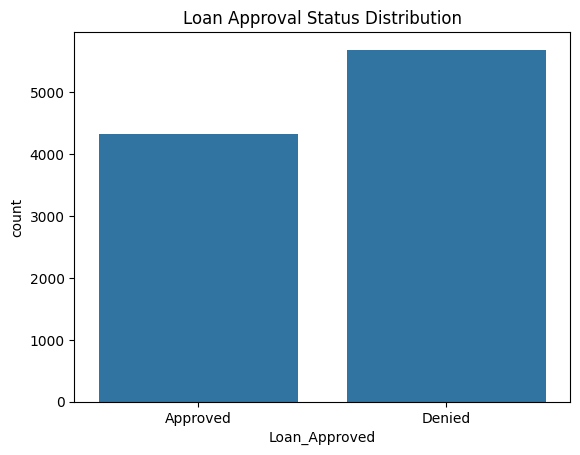

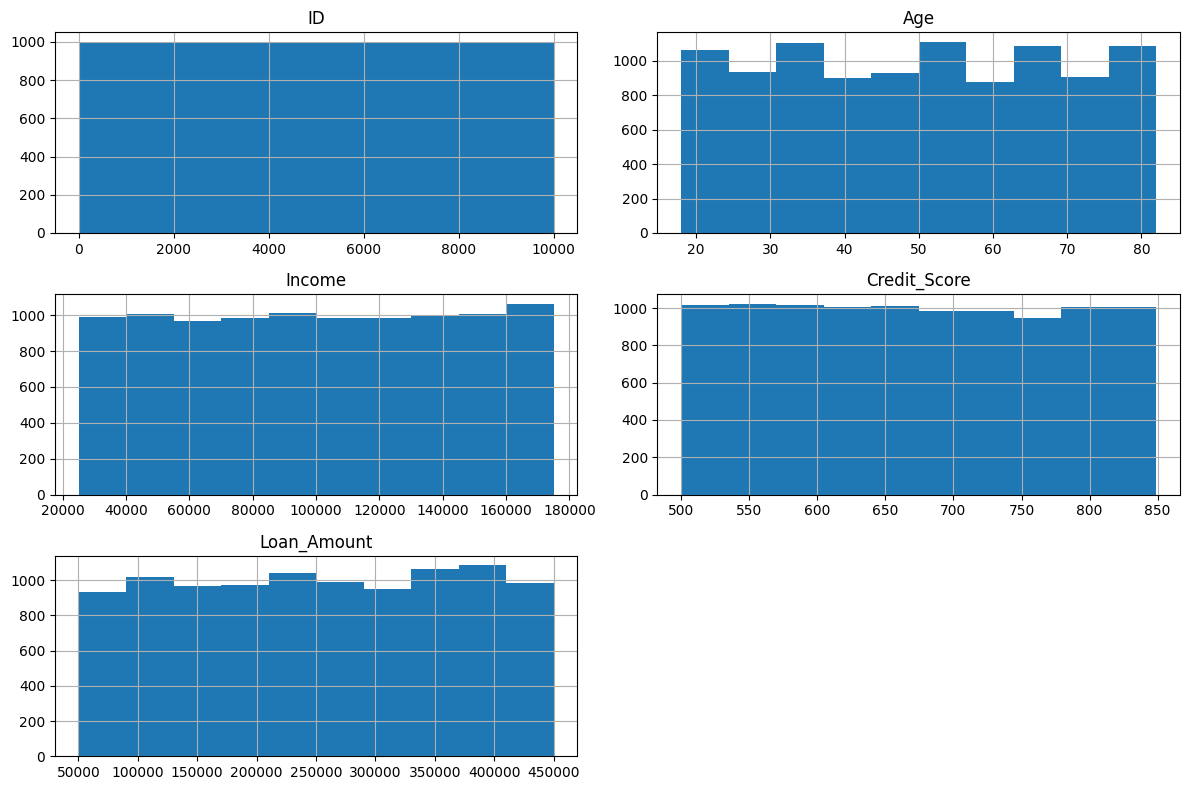

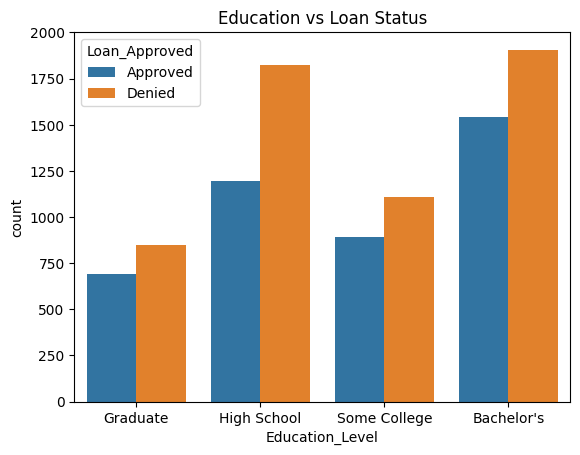

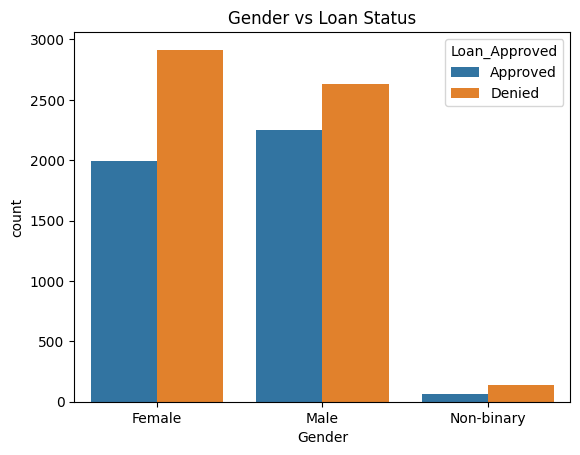

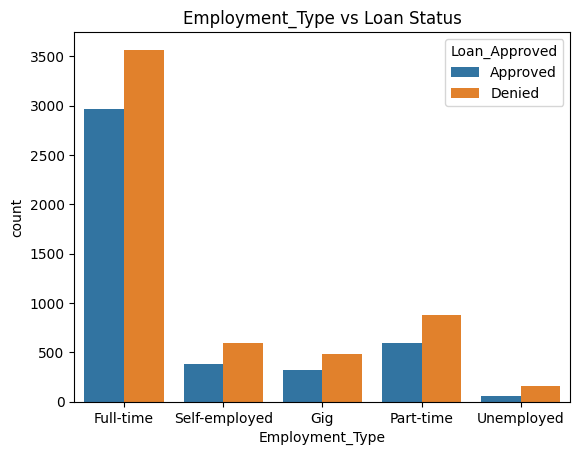

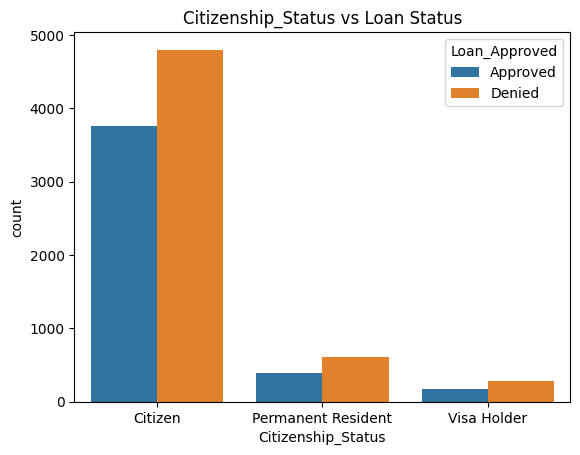

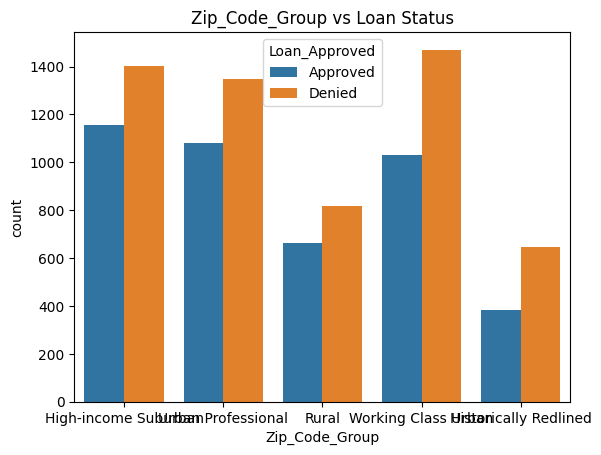

In [57]:

# 📌 3. Exploratory Data Analysis (EDA)
print(df.info())
print(df.describe())
print(df.isnull().sum())

# Target distribution
sns.countplot(x='Loan_Approved', data=df)
plt.title('Loan Approval Status Distribution')
plt.show()

# Numerical feature distribution
df.hist(bins=10, figsize=(12,8))
plt.tight_layout()
plt.show()

# Categorical feature relationships
sns.countplot(x='Education_Level', hue='Loan_Approved', data=df)
plt.title('Education vs Loan Status')
plt.show()

sns.countplot(x='Gender', hue='Loan_Approved', data=df)
plt.title('Gender vs Loan Status')
plt.show()

sns.countplot(x='Employment_Type', hue='Loan_Approved', data=df)
plt.title('Employment_Type vs Loan Status')
plt.show()

sns.countplot(x='Citizenship_Status', hue='Loan_Approved', data=df)
plt.title('Citizenship_Status vs Loan Status')
plt.show()

sns.countplot(x='Zip_Code_Group', hue='Loan_Approved', data=df)
plt.title('Zip_Code_Group vs Loan Status')
plt.show()


In [58]:
# 📌 4 Data Preprocessing

# Fill missing values
for col in ['Age', 'Income', 'Credit_Score']:
   df[col].fillna(df[col].mode()[0], inplace=True)

for col in ['Loan_Amount']:
    df[col].fillna(df[col].median(), inplace=True)

# Drop Loan_ID (not predictive)
#df.drop('ID', axis=1, inplace=True)

# Encode categorical variables
le = LabelEncoder()
for col in ['Gender', 'Race', 'Age_Group', 'Employment_Type',	'Education_Level', 'Citizenship_Status', 'Language_Proficiency', 'Disability_Status', 'Criminal_Record', 'Zip_Code_Group', 'Loan_Approved']:
    df[col] = le.fit_transform(df[col])

In [59]:
# 📌 5. Feature Engineering


# Log Transformation for skewed data
#df['Loan_Amount_Log'] = np.log(df['Loan_Amount'])

# Drop old income fields
#df.drop(['Loan_Amount'], axis=1, inplace=True)

In [60]:
# 📌 6. Splitting Data
uploaded = files.upload()




Saving test.csv to test (3).csv


In [61]:
# Training data (features and target)
X_train = df.drop('Loan_Approved', axis=1)
y_train = df['Loan_Approved']

# Test data (features only)
X_test = pd.read_csv('test.csv')

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [65]:
# 📌 4.1 Data Preprocessing

# Fill missing values
for col in ['Age', 'Income', 'Credit_Score']:
   X_test[col].fillna(df[col].mode()[0], inplace=True)

for col in ['Loan_Amount']:
    X_test[col].fillna(df[col].median(), inplace=True)

# Drop Loan_ID (not predictive)
#df.drop('ID', axis=1, inplace=True)

# Encode categorical variables
le = LabelEncoder()
for col in ['Gender', 'Race', 'Age_Group', 'Employment_Type',	'Education_Level', 'Citizenship_Status', 'Language_Proficiency', 'Disability_Status', 'Criminal_Record', 'Zip_Code_Group']:
    X_test[col] = le.fit_transform(X_test[col])

In [66]:
# 📌 7. Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [67]:
# 📌 8. Model Building

# Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(X_train_scaled, y_train)
y_pred_lr = log_reg.predict(X_test_scaled)

In [68]:
# 📌 9. Hyperparameter Tuning (Random Forest)
rf = RandomForestClassifier(random_state=42)
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10]
}
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
best_rf = grid_search.best_estimator_
y_pred_rf = best_rf.predict(X_test)

Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.42      0.32      0.36      1051
           1       0.58      0.68      0.62      1449

    accuracy                           0.53      2500
   macro avg       0.50      0.50      0.49      2500
weighted avg       0.51      0.53      0.51      2500

Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.39      0.24      0.30      1051
           1       0.57      0.73      0.64      1449

    accuracy                           0.52      2500
   macro avg       0.48      0.49      0.47      2500
weighted avg       0.50      0.52      0.50      2500



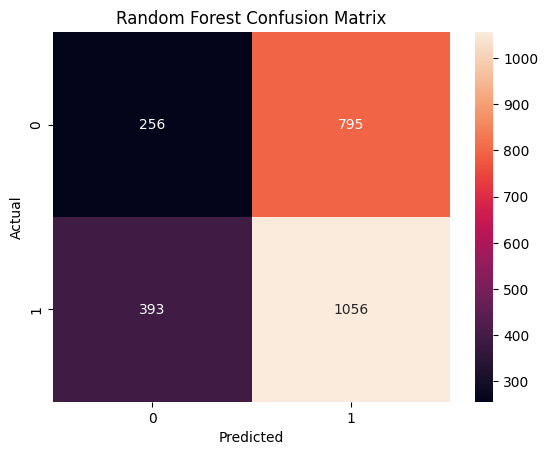

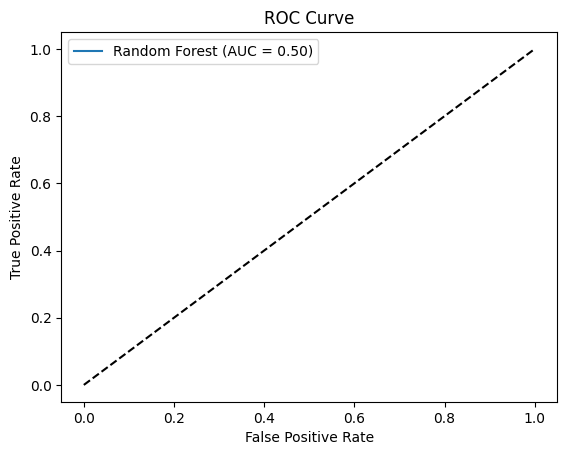

In [69]:
# 📌 10. Model Evaluation

y_test = y_train.iloc[:2500]

# Logistic Regression Evaluation
print("Logistic Regression Classification Report:\n", classification_report(y_test, y_pred_lr))

# Random Forest Evaluation
print("Random Forest Classification Report:\n", classification_report(y_test, y_pred_rf))

# Confusion Matrix
conf_mat = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(conf_mat, annot=True, fmt='d')
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# ROC Curve for Random Forest
y_prob_rf = best_rf.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_prob_rf, pos_label='Approved')
plt.plot(fpr, tpr, label='Random Forest (AUC = %0.2f)' % roc_auc_score(y_test, y_prob_rf))
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [70]:
# 📌 11. Output Results - Random Forest


# Convert numeric predictions to 'Y' / 'N'
#loan_status = ['Denied' if pred == 0 else 'Approved' for pred in y_pred_rf]

# Create a DataFrame with 'ID' and 'Loan_Approved'
submission = pd.DataFrame({
    'ID': X_test['ID'],
    'Loan_Approved':  ['Approved' if pred==1 else 'Denied' for pred in y_pred_rf]
})

# Export to CSV without index
submission.to_csv('submission.csv', index=False)

**ALTERNATIVE ALGORITHMS**

In [71]:
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

param_grid_xgb = {
    'n_estimators': [50, 100],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1]
}

grid_search_xgb = GridSearchCV(xgb, param_grid_xgb, cv=5, scoring='accuracy')
grid_search_xgb.fit(X_train, y_train)
best_xgb = grid_search_xgb.best_estimator_

y_pred_xgb = best_xgb.predict(X_test)
y_prob_xgb = best_xgb.predict_proba(X_test)[:,1]


**Hyperparameter Tuning (LightGBM)**

In [72]:
lgbm = LGBMClassifier(random_state=42)

param_grid_lgbm = {
    'n_estimators': [50, 100],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1],
    'subsample': [0.8, 1]
}

grid_search_lgbm = GridSearchCV(lgbm, param_grid_lgbm, cv=5, scoring='accuracy')
grid_search_lgbm.fit(X_train, y_train)
best_lgbm = grid_search_lgbm.best_estimator_

y_pred_lgbm = best_lgbm.predict(X_test)
y_prob_lgbm = best_lgbm.predict_proba(X_test)[:,1]


Streaming output truncated to the last 5000 lines.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posit

**Updated Model Evaluation (XGBoost & LightGBM)**

XGBoost Classification Report:
               precision    recall  f1-score   support

           0       0.40      0.26      0.32      1051
           1       0.57      0.71      0.64      1449

    accuracy                           0.53      2500
   macro avg       0.49      0.49      0.48      2500
weighted avg       0.50      0.53      0.50      2500

LightGBM Classification Report:
               precision    recall  f1-score   support

           0       0.39      0.24      0.30      1051
           1       0.57      0.73      0.64      1449

    accuracy                           0.53      2500
   macro avg       0.48      0.49      0.47      2500
weighted avg       0.50      0.53      0.50      2500



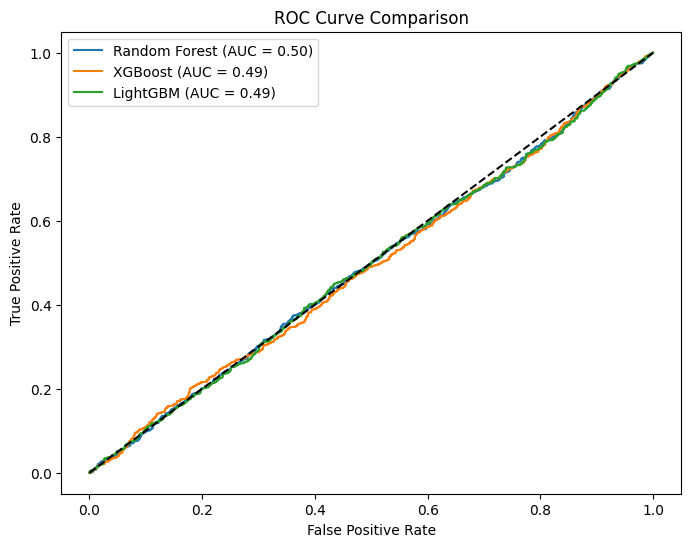

In [73]:
# Classification Reports
print("XGBoost Classification Report:\n", classification_report(y_test, y_pred_xgb))
print("LightGBM Classification Report:\n", classification_report(y_test, y_pred_lgbm))

# ROC Curves Comparison
plt.figure(figsize=(8,6))

# Random Forest
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)
plt.plot(fpr_rf, tpr_rf, label='Random Forest (AUC = %0.2f)' % roc_auc_score(y_test, y_prob_rf))

# XGBoost
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_prob_xgb)
plt.plot(fpr_xgb, tpr_xgb, label='XGBoost (AUC = %0.2f)' % roc_auc_score(y_test, y_prob_xgb))

# LightGBM
fpr_lgbm, tpr_lgbm, _ = roc_curve(y_test, y_prob_lgbm)
plt.plot(fpr_lgbm, tpr_lgbm, label='LightGBM (AUC = %0.2f)' % roc_auc_score(y_test, y_prob_lgbm))

plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend()
plt.show()


**Summary Table**

In [75]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# List to collect result rows
results_list = []

# Loop through models and predictions
for model, pred in zip(models, predictions):
    results_list.append({
        'Model': model,
        'Accuracy': accuracy_score(y_test, pred),
        'Precision': precision_score(y_test, pred),
        'Recall': recall_score(y_test, pred),
        'F1-Score': f1_score(y_test, pred)
    })

# Create DataFrame once from the list
results = pd.DataFrame(results_list)

**Feature Importance Visualizations**

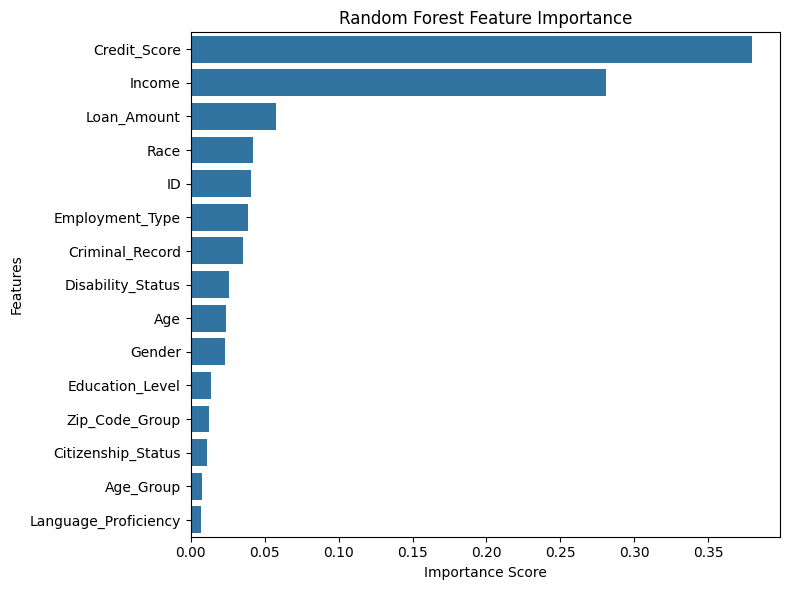

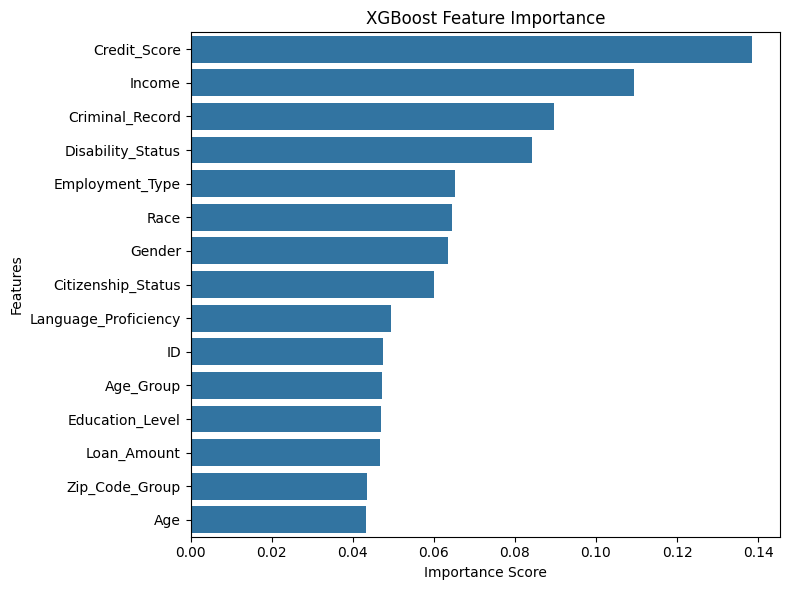

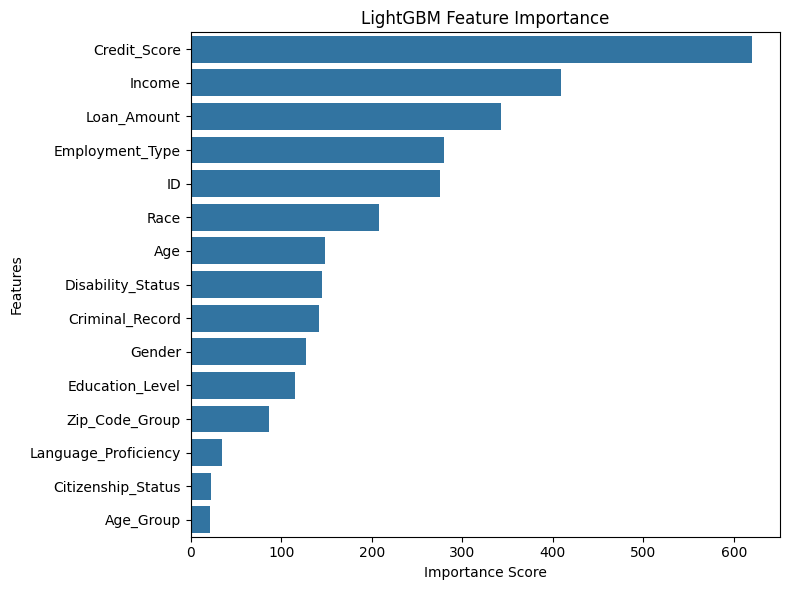

In [76]:
# List of feature names
feature_names = X_train.columns

# Function to plot feature importance
def plot_feature_importance(model, model_name):
    importances = model.feature_importances_
    indices = np.argsort(importances)[::-1]  # descending order

    plt.figure(figsize=(8,6))
    sns.barplot(x=importances[indices], y=feature_names[indices])
    plt.title(f'{model_name} Feature Importance')
    plt.xlabel('Importance Score')
    plt.ylabel('Features')
    plt.tight_layout()
    plt.show()

# 📊 Random Forest
plot_feature_importance(best_rf, 'Random Forest')

# 📊 XGBoost
plot_feature_importance(best_xgb, 'XGBoost')

# 📊 LightGBM
plot_feature_importance(best_lgbm, 'LightGBM')


**Alternative: XGBoost Built-in Importance Plot**

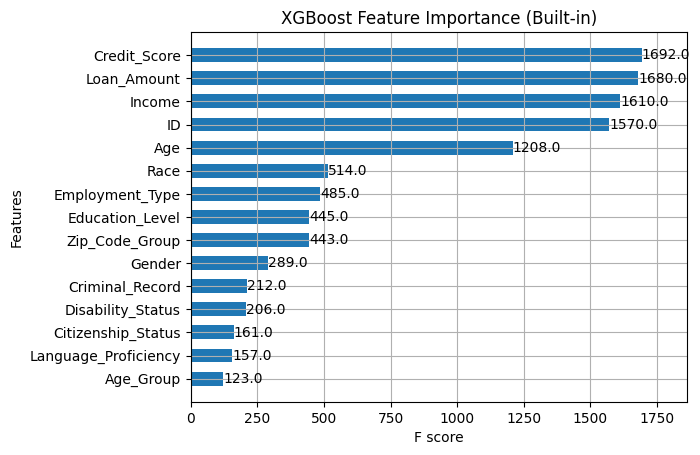

In [77]:
from xgboost import plot_importance

plot_importance(best_xgb, height=0.6)
plt.title('XGBoost Feature Importance (Built-in)')
plt.show()


**SHAP Values Visualization (for XGBoost, LightGBM, Random Forest)**

 96%|=================== | 2401/2500 [00:16<00:00]       

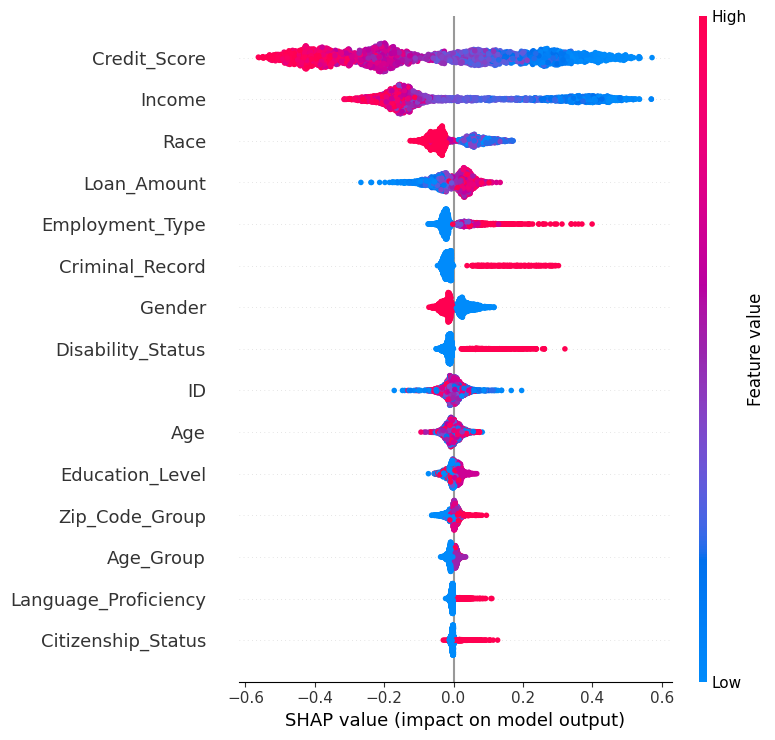

In [78]:
import shap

# Initialize the SHAP explainer for XGBoost
explainer_xgb = shap.Explainer(best_xgb, X_train)

# Calculate SHAP values
shap_values_xgb = explainer_xgb(X_test)

# 📊 Summary Plot: Feature impact on predictions
shap.summary_plot(shap_values_xgb, X_test)


 **SHAP for LightGBM**

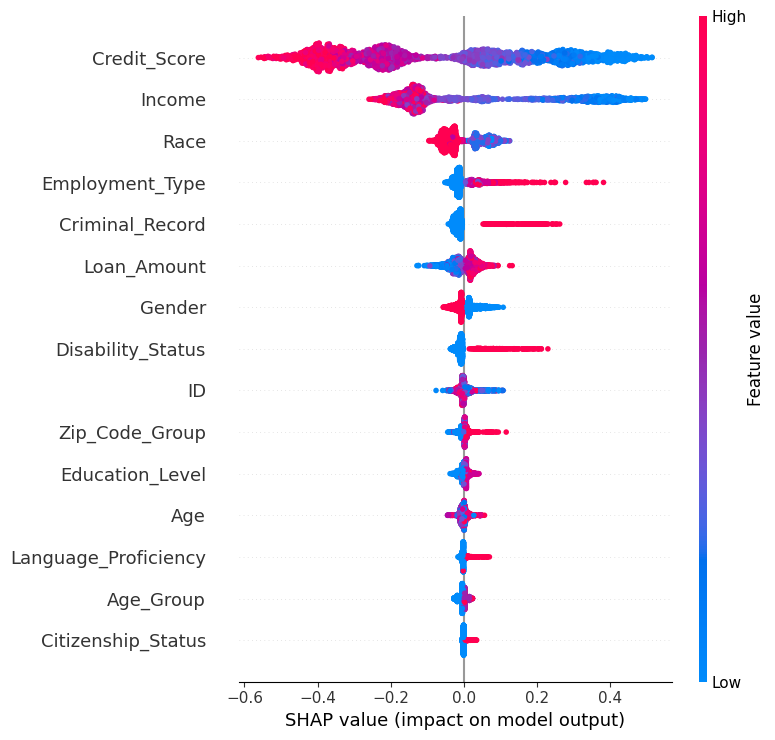

In [79]:
# Initialize the SHAP explainer for LightGBM
explainer_lgbm = shap.Explainer(best_lgbm, X_train)

# Calculate SHAP values
shap_values_lgbm = explainer_lgbm(X_test)

# 📊 Summary Plot: Feature impact on predictions
shap.summary_plot(shap_values_lgbm, X_test)


**SHAP for Random Forest**

 98%|===================| 4925/5000 [00:22<00:00]       

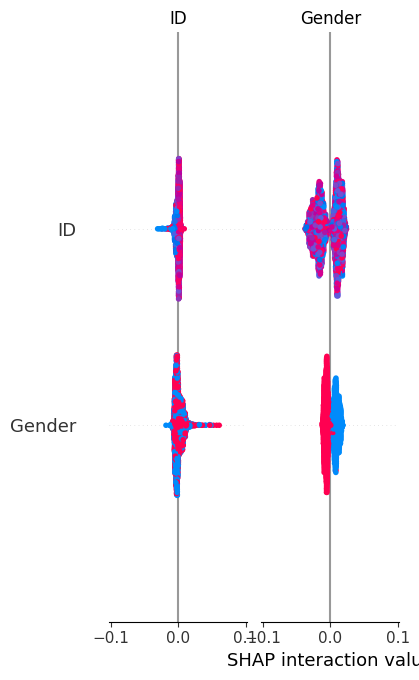

In [80]:
# Initialize the SHAP explainer for Random Forest
explainer_rf = shap.Explainer(best_rf, X_train)

# Calculate SHAP values
shap_values_rf = explainer_rf(X_test)

# 📊 Summary Plot: Feature impact on predictions
shap.summary_plot(shap_values_rf, X_test)


In [ ]:
shap.plots.force(shap_values_rf[0])
plt.savefig('shap_force_rf_instance0.png', dpi=300, bbox_inches='tight')
plt.close()

**LIME Explanations for Random Forest Example**

In [84]:
from lime.lime_tabular import LimeTabularExplainer

# Initialize LIME Explainer
explainer_lime = LimeTabularExplainer(
    training_data=np.array(X_train),
    feature_names=X_train.columns.tolist(),
    class_names=['Not Approved', 'Approved'],
    mode='classification'
)

# Pick a test instance to explain (e.g. first one)
i = 0
exp = explainer_lime.explain_instance(
    data_row=X_test.iloc[i],
    predict_fn=best_rf.predict_proba
)

# Show explanation in notebook
exp.show_in_notebook(show_table=True)


In [85]:
# Get LIME explanation as a matplotlib figure
fig = exp.as_pyplot_figure()

# Save it as PNG
fig.savefig('lime_explanation_rf_instance0.png', dpi=300, bbox_inches='tight')
plt.close(fig)

THANK YOU!